# EIT Continous Model - Solver

Antes de utilizar o COLAB, é necessário instalar o FENICS e realizar o upload dos módulos. Procedimento é realizado nas próximas duas células. A vantagem é que não precisa instalar mais nada no computador. A desvantagem é fica mais lerdo por não rodar no bash. Repare, a primeira vez que você rodar vai demorar um pouco por causa que todo o código será compilado em C++ para depois ser reutilizado. Depois, pequenas alterações costumam ser rapidamente calculadas.

In [1]:
#https://fem-on-colab.github.io
try:
    import google.colab  # noqa: F401
except ImportError:
    import ufl
    import dolfin
else:
    try:
        import ufl_legacy
        import dolfin
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import ufl
        import dolfin

/home/derick/miniconda3/lib/python3.8/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Status size changed, may indicate binary incompatibility. Expected 40 from C header, got 48 from PyObject
  def compile_class(cpp_data, mpi_comm=MPI.comm_world):
/home/derick/miniconda3/lib/python3.8/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Datatype size changed, may indicate binary incompatibility. Expected 24 from C header, got 32 from PyObject
  def compile_class(cpp_data, mpi_comm=MPI.comm_world):
/home/derick/miniconda3/lib/python3.8/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Request size changed, may indicate binary incompatibility. Expected 32 from C header, got 40 from PyObject
  def compile_class(cpp_data, mpi_comm=MPI.comm_world):
/home/derick/miniconda3/lib/python3.8/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Prequest size changed, may indicate binary incompatibility. Expected 32 from C header, got 40 from PyOb

In [2]:
# "Upload here module files"
# from google.colab import files
# uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
from CONT_onefile import*
import matplotlib.pyplot as plt
import time
import pandas as pd

%matplotlib inline
#apenas para aparecer os plots.

In [4]:
set_log_level(LogLevel.WARNING) #Control outputs fenics

## Defining mesh

In [5]:
radius = 1
mesh_inverse, mesh_direct=MyMesh(r=radius, n=8, n_vertex=321)
mesh_direct=refine(mesh_direct)

1070


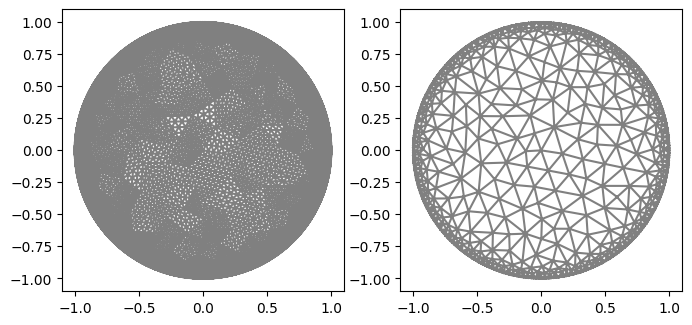

In [6]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_direct);
plt.subplot(1,2,2)
plot(mesh_inverse);
print(mesh_inverse.num_cells())

In [7]:
"Current"
n_g = 10
#I_all=current_method(n_g, value=1, method=1)
value = 1

I_all=[Expression(f" x[1]>=0 ? {value}*sin(acos(x[0])*{i+1}) : {value}*sin((-acos(x[0]))*{i+1})",degree=1) for i in range(0,n_g)]


#print(type(I_all))
#print(I_all)

/home/derick/miniconda3/lib/python3.8/site-packages/dolfin/jit/jit.py:46: RuntimeWarning: mpi4py.MPI.Status size changed, may indicate binary incompatibility. Expected 40 from C header, got 48 from PyObject
  if MPI.size(mpi_comm) == 1:
/home/derick/miniconda3/lib/python3.8/site-packages/dolfin/jit/jit.py:46: RuntimeWarning: mpi4py.MPI.Datatype size changed, may indicate binary incompatibility. Expected 24 from C header, got 32 from PyObject
  if MPI.size(mpi_comm) == 1:
/home/derick/miniconda3/lib/python3.8/site-packages/dolfin/jit/jit.py:46: RuntimeWarning: mpi4py.MPI.Request size changed, may indicate binary incompatibility. Expected 32 from C header, got 40 from PyObject
  if MPI.size(mpi_comm) == 1:
/home/derick/miniconda3/lib/python3.8/site-packages/dolfin/jit/jit.py:46: RuntimeWarning: mpi4py.MPI.Prequest size changed, may indicate binary incompatibility. Expected 32 from C header, got 40 from PyObject
  if MPI.size(mpi_comm) == 1:
/home/derick/miniconda3/lib/python3.8/site-pack

Calling FFC just-in-time (JIT) compiler, this may take some time.


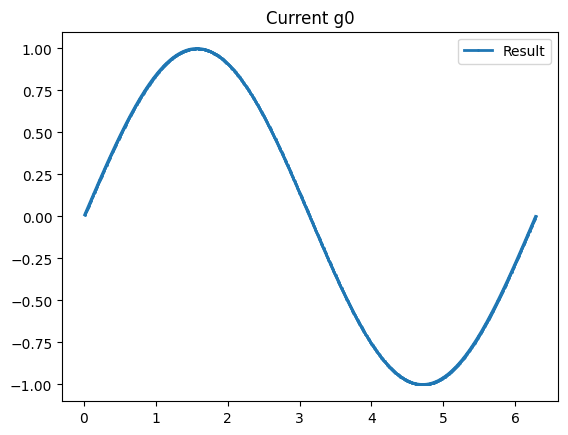

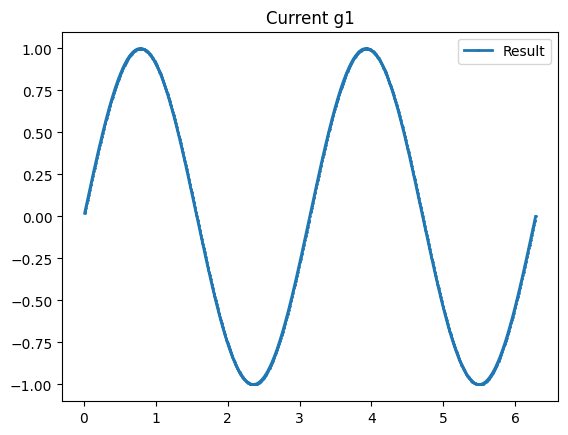

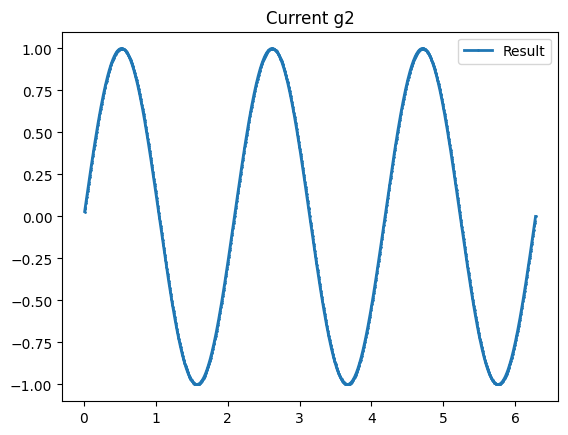

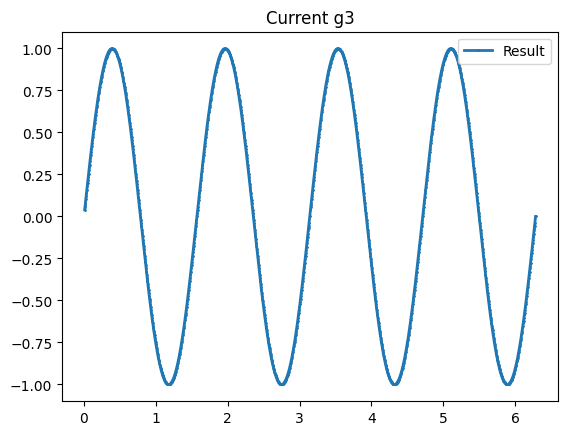

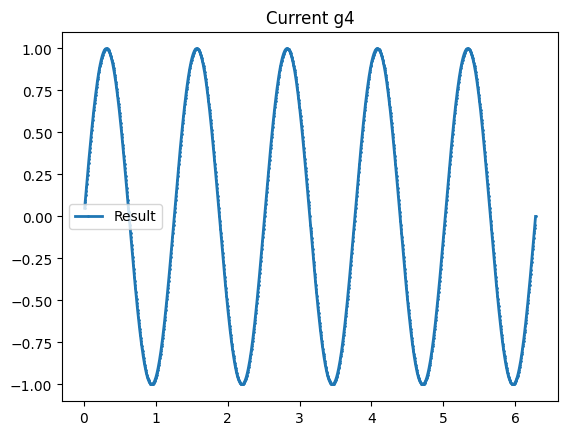

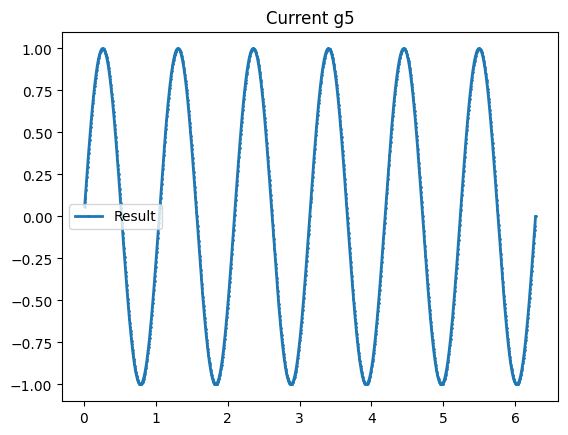

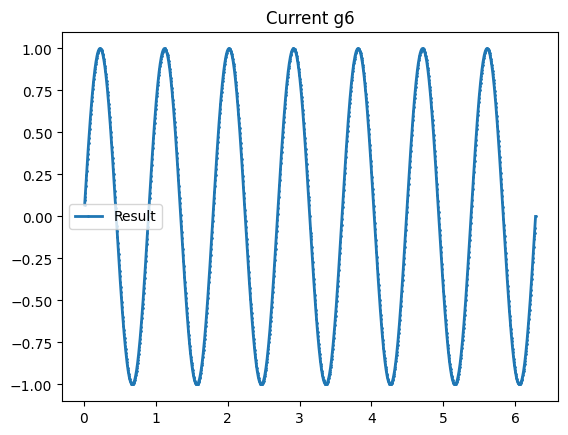

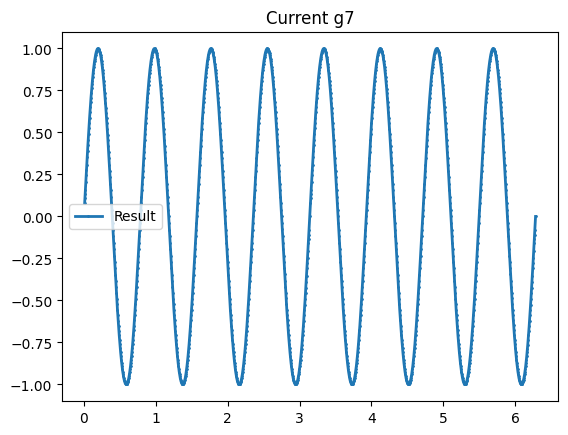

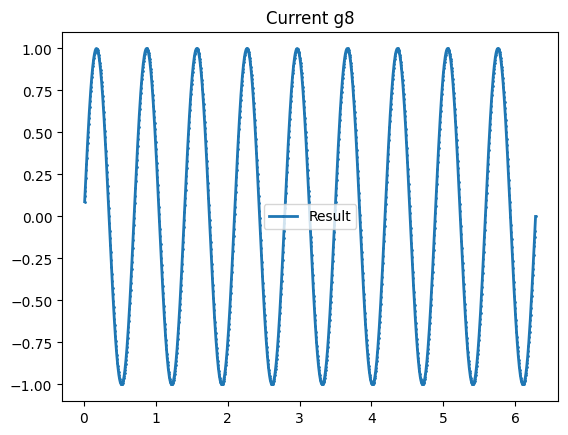

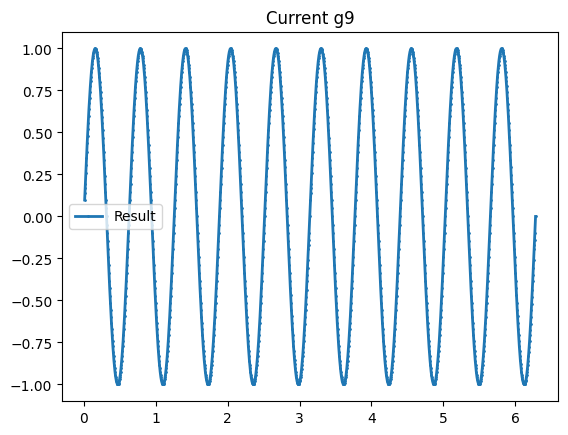

In [8]:
#Plotting
for i in range(n_g):
        mesh=mesh_direct
        VD=FiniteElement('CG',mesh.ufl_cell(),1)
        g_u=interpolate(I_all[i], FunctionSpace(mesh,VD))
        g_u=getBoundaryVertex(mesh, g_u)
        bond=plot_boundary(mesh, data=g_u, name='Current g'+str(i))

Calling FFC just-in-time (JIT) compiler, this may take some time.


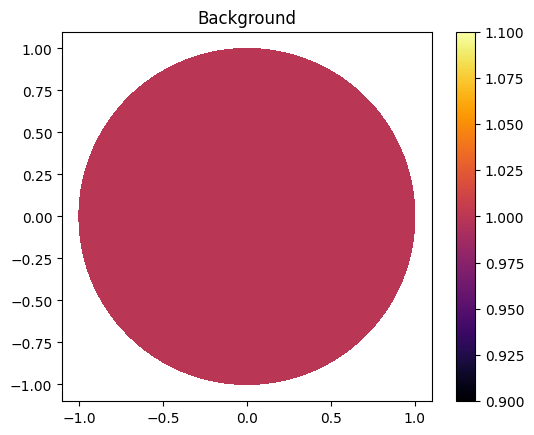

In [9]:
"Background"
bg = 1 #background conductivity
ValuesCells0=GammaCircle(mesh_direct,10,bg,0, 0, 0); #mesh, cond_inclusion, cond_background, x_center_incl, y_center_incl, radius_incl.
gamma0=CellFunction(mesh_direct, values=ValuesCells0);#Pega o vetor e transforma em uma função

"Plot"
V_DG=FiniteElement('DG',mesh_inverse.ufl_cell(),0)
gamma_direct=plot_figure(mesh_direct, V_DG, gamma0, name="Background");

In [10]:
"Solve Forward Problem with Background"
VD=FiniteElement('CG',mesh_direct.ufl_cell(),1)

ForwardObject=ForwardProblem(mesh_direct)
list_u0=ForwardObject.solve_forward(VD, gamma0, I_all)

u0_boundary=ForwardObject.boundary_array(mesh_direct) #Boundary data in the mesh_direct
#print(list_u0[0](0,0.1))
#print(type(u0_boundary))

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


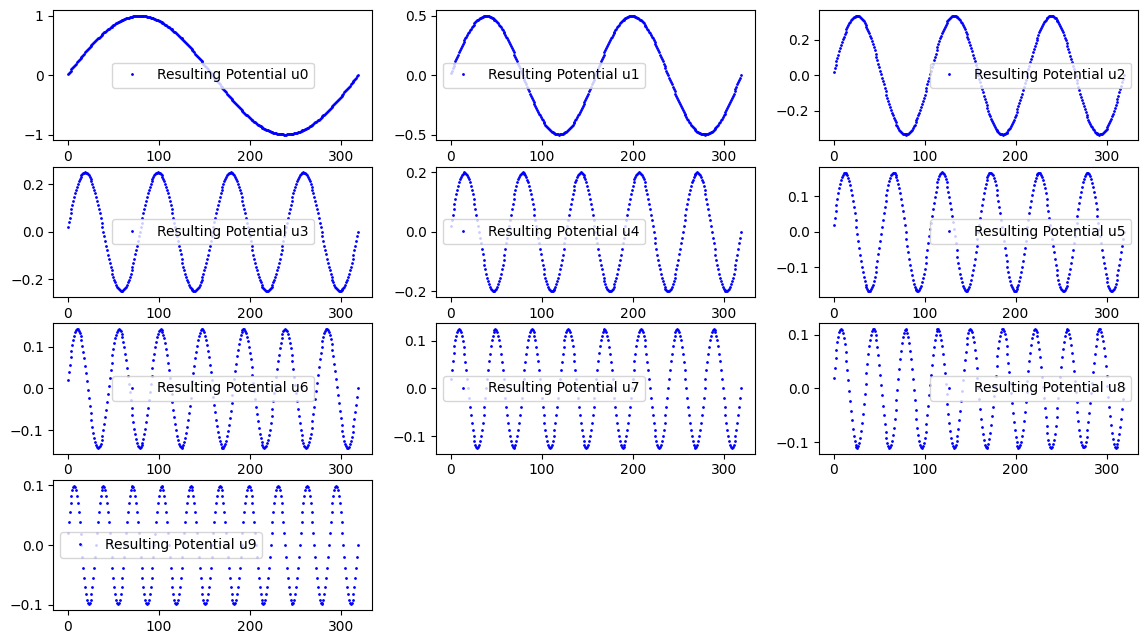

In [11]:
"Plot Resulting Potentials"

# index=0 #Index solution plot

u0_boundary_c=ForwardObject.boundary_array(mesh_inverse, concatenate=False)

plt.figure(figsize=(14, 2*n_g))
for i in range(0,n_g):
  data_u0=plot_boundary(mesh_inverse, data=u0_boundary_c[i], name='boundary u'+str(i), line=0, plot=False)
  x=range(len(data_u0[:,1]))
  plt.subplot(n_g,3,i+1)
  plt.plot(x, data_u0[:,1], linewidth=0,  marker='.', markersize=2, label="Resulting Potential u"+str(i), color="blue");
  plt.legend()

plt.show()


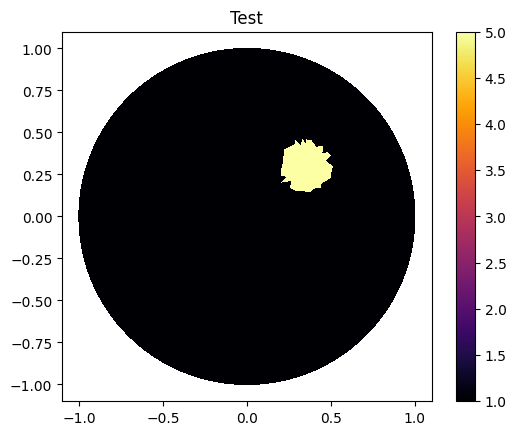

In [12]:
"First Test: Background + Inclusion"
iv = 5 # inclusion conductivity
ValuesCells1=GammaCircle(mesh_direct,iv,bg,0.15, 0.35, 0.30); #mesh, cond_inclusion, cond_background, x_center_incl, y_center_incl, radius_incl.
#print(ValuesCells1)
gamma1=CellFunction(mesh_direct, values=ValuesCells1);#Transforms the vector in a function

"Plot"
V_DG=FiniteElement('DG',mesh_inverse.ufl_cell(),0)
gamma_direct=plot_figure(mesh_direct, V_DG, gamma1, name="Test");

1.0
1.0


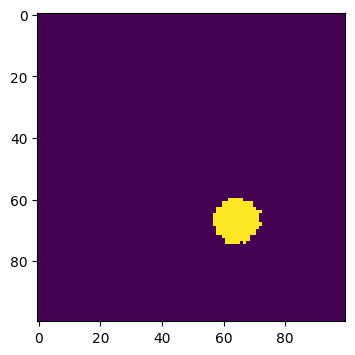

In [13]:
"Define data in a homogeneus grid for training"

V_DG=FiniteElement('DG',mesh_inverse.ufl_cell(),0)     #Space of Finite Elemente descontinuous garlekin degree 0
Q=FunctionSpace(mesh_direct,V_DG)                     #Functionspace to interpolate gamma
gamma1_1=interpolate(gamma1, Q)

N = 100  # grid with N*N points (works well with 0 < N < 400)
h = 2*radius/(N-1)   # step-size
x = [-radius + i*h for i in range(N)] # grid points
y = x

A = np.zeros((N,N)) # create an array of N columns and N rows

for i in range(N):
  for j in range(N):
    if x[i]**2 + y[j]**2 < radius**2: # if the grid point is in the circle
      A[i][j] = gamma1_1(x[i],y[j])
    else:
      A[i][j] = bg
for r in A:
  ' '.join([str(x) for x in r] )

print(gamma1_1(x[75],y[75]))
print(A[75][75])

plt.figure(figsize=(4, 4))
plt.imshow(A, interpolation='none')

In [14]:
"Solve Forward Problem with Background + Inclusion"
VD=FiniteElement('CG',mesh_direct.ufl_cell(),1)

ForwardObject=ForwardProblem(mesh_direct)
list_u1=ForwardObject.solve_forward(VD, gamma1, I_all)

u1_boundary=ForwardObject.boundary_array(mesh_direct) #Boundary data in the mesh_direct

#print(len(list_u1))
#print(len(u1_boundary))
#print(u1_boundary)


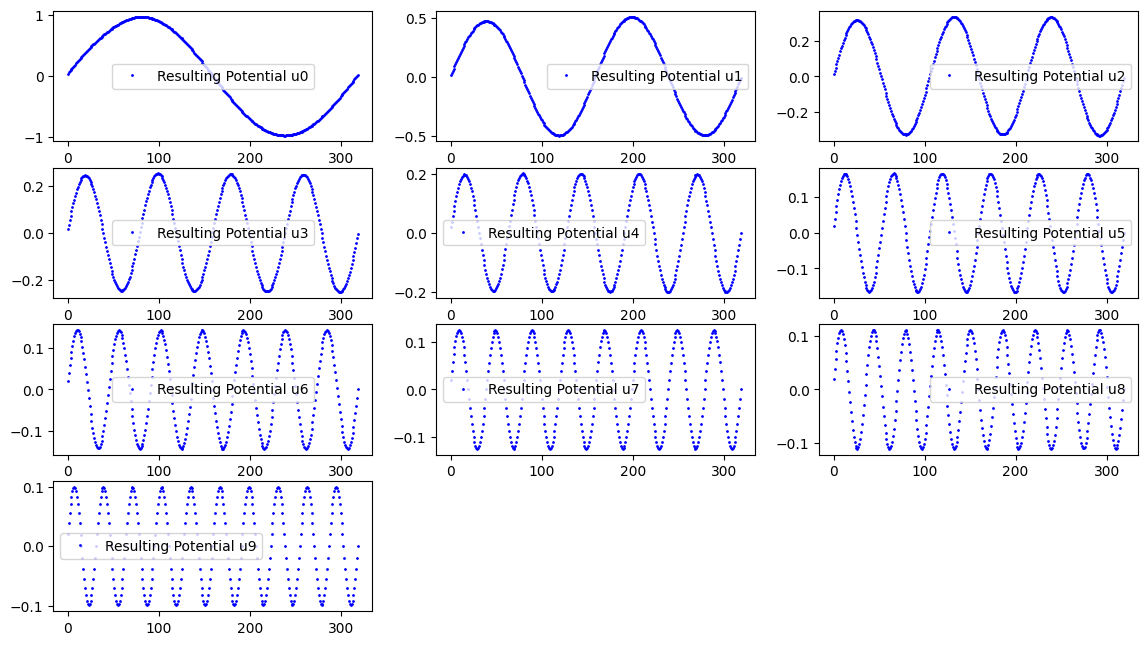

In [15]:
"Plot Resulting Potentials"

u1_boundary_c=ForwardObject.boundary_array(mesh_inverse, concatenate=False)

plt.figure(figsize=(14, 2*n_g))
for i in range(0,n_g):
  data_u1=plot_boundary(mesh_inverse, data=u1_boundary_c[i], name='boundary u'+str(i), line=0, plot=False)
  x=range(len(data_u1[:,1]))
  plt.subplot(n_g,3,i+1)
  plt.plot(x, data_u1[:,1], linewidth=0,  marker='.', markersize=2, label="Resulting Potential u"+str(i), color="blue");
  plt.legend()

plt.show()

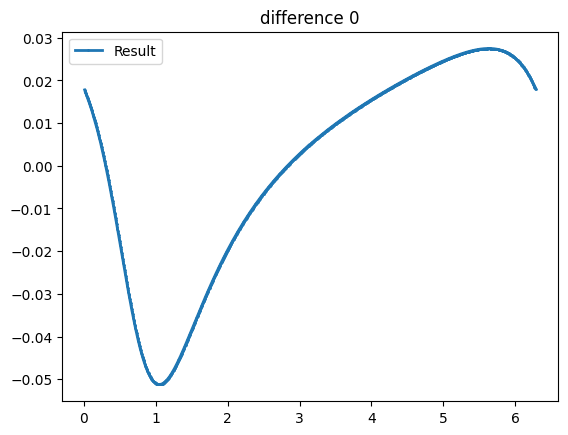

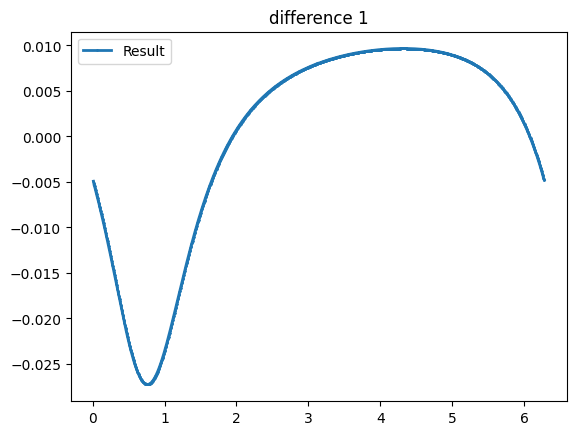

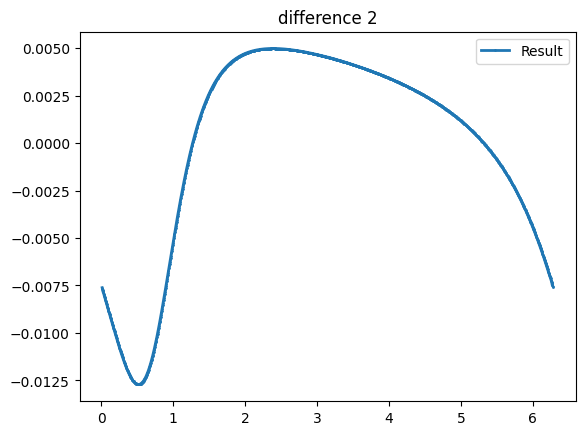

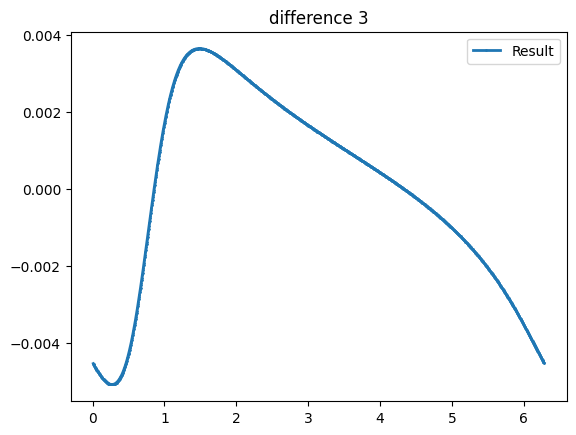

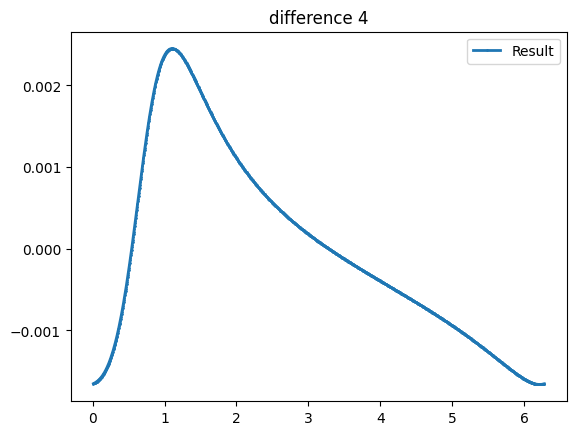

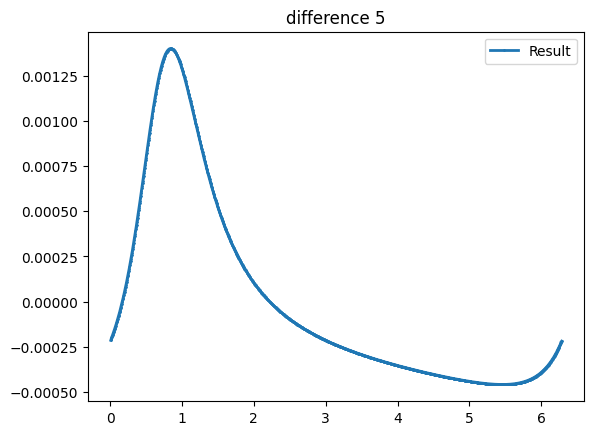

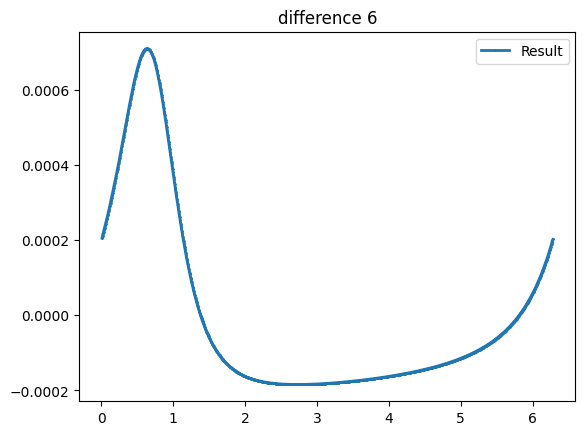

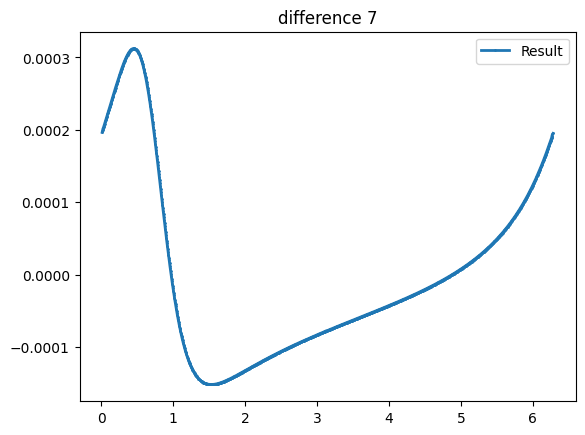

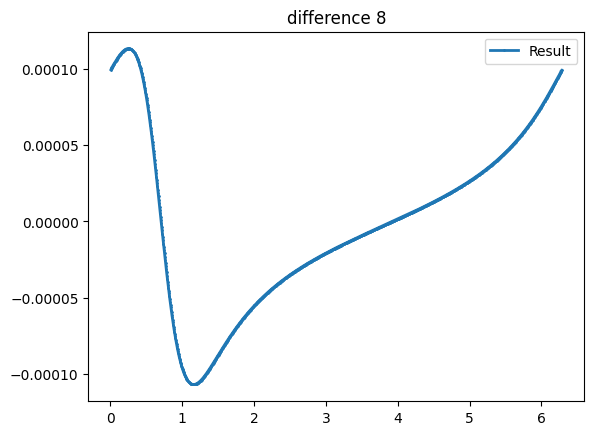

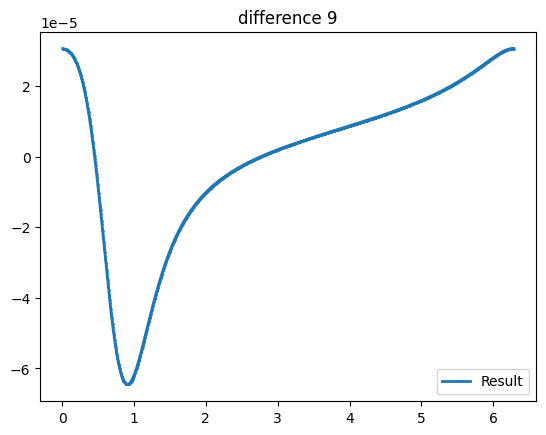

In [16]:
"Plot Difference of Potentials"

diff2 =[]
for i in range(0, n_g):
  mesh=mesh_direct #Make sure you're using the right mesh
  bmesh=BoundaryMesh(mesh, 'exterior', order=True) #Define a boundary mesh
  vertex=bmesh.entity_map(0).array() #Get the vertex on the boundary
  V=FunctionSpace(mesh, "CG",1 ) #Define a function space
  diff=Function(V) #Define a function in V
  ind=vertex_to_dof_map(V) #Map from vertex to Degree of Freedom (DOF)
  #print(ind)
  #print(vertex)
  z=len(vertex)
  diff.vector()[ind[vertex]]=u1_boundary[i*z:(i+1)*z]-u0_boundary[i*z:(i+1)*z] #Set the function values on boundary
  #print(diff.vector()[0:20])
  diff_vec=getBoundaryVertex(mesh, diff)
  bond=plot_boundary(mesh, data=diff_vec, name='difference '+str(i))
  diff2.append(diff)

#differ=u1_boundary-u0_boundary
#x=range(len(differ))

#plt.figure(figsize=(14, 5),)
#plt.subplot(1,2,1)
#plt.plot(x, differ, linewidth=1,  marker='.', markersize=1, label="Difference of Potential", color="blue");
#plt.legend()


Calling FFC just-in-time (JIT) compiler, this may take some time.


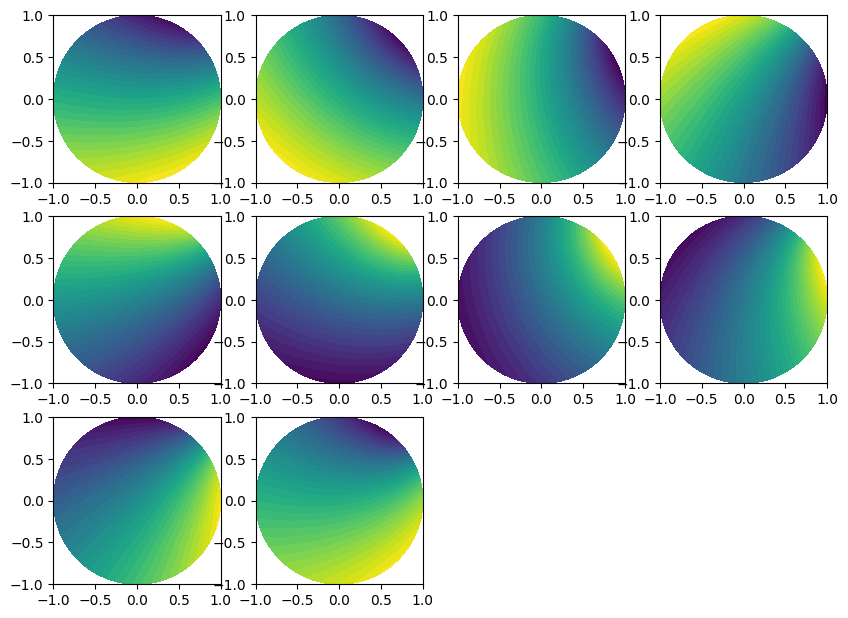

In [17]:
"Forward Problem with Difference of Potentials"

list_differ=ForwardObject.solve_forward(VD, gamma0, diff2)

#print(list_differ)

"Plot Resulting Potential (Data for training)"

# u_differ_boundary_c=ForwardObject.boundary_array(mesh_inverse, concatenate=False)
#
#plt.figure(figsize=(14, 2*n_g))
#for i in range(0,n_g):
#  data_u_differ=plot_boundary(mesh_inverse, data=u_differ_boundary_c[i], name='boundary u'+str(i), line=0, plot=False)
#  x=range(len(data_u_differ[:,1]))
#  plt.subplot(n_g,3,i+1)
#  plt.plot(x, data_u_differ[:,1], linewidth=0,  marker='.', markersize=2, label="Resulting Potential u"+str(i), color="blue");
#  plt.legend()
#
#plt.show()

plt.figure(figsize=(10, 10))
for i in range(0, n_g):
    plt.subplot(4,4,i+1)
    plot(list_differ[i])


0.002591985504206671
0.002591985504206671


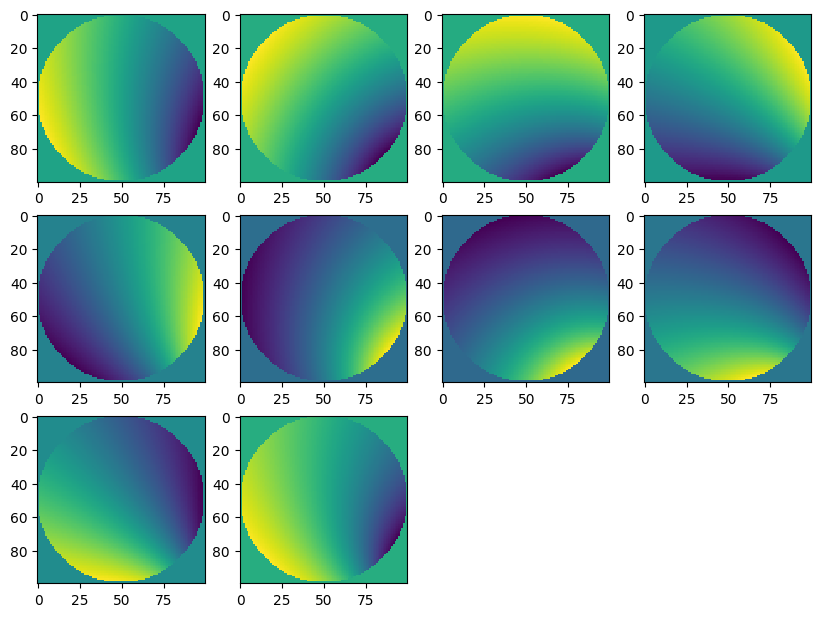

In [18]:
"Define data in a homogeneus grid for training"

N = 100  # grid with N*N points
h = 2*radius/(N-1)   # step-size
x = [-radius + i*h for i in range(N)] # grid points
y = x

T = np.zeros((n_g,N,N))

for k in range(n_g):
  for i in range(N):
      for j in range(N):
        if x[i]**2 + y[j]**2 < radius**2: # if the grid point is in the circle
          T[k][i][j] = list_differ[k](x[i],y[j])
        else:
          T[k][i][j] = 0
  for r in T[k]:
    ' '.join([str(x) for x in r] )


plt.figure(figsize=(10, 10))
for i in range(0, n_g):
    plt.subplot(4,4,i+1)
    plt.imshow(T[i], interpolation='none')

print(list_differ[2](x[30],y[30]))
print(T[2][30][30])